# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metrics"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url = f"{url}appid={weather_api_key}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | gwadar
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | coquimbo
Processing Record 9 of Set 1 | tabou
Processing Record 10 of Set 1 | murzuq
Processing Record 11 of Set 1 | ntossoni
City not found. Skipping...
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | ouardenine
Processing Record 17 of Set 1 | northam
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | taltal
Pro

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url = f"{url}appid={weather_api_key}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | ginir
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | bam
Processing Record 5 of Set 1 | marrakesh
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | machico
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | howrah
Processing Record 10 of Set 1 | leava
Processing Record 11 of Set 1 | agat village
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | kitakata
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | nadi
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | buckeye
Processing Record 21 of Set 1 | kozhevnikovo
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | p

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,285.40,35,75,5.66,CL,1730566540
1,papatowai,-46.5619,169.4708,275.54,90,49,3.52,NZ,1730566542
2,gwadar,25.1216,62.3254,300.77,76,0,6.26,PK,1730566337
3,ushuaia,-54.8000,-68.3000,279.96,61,40,10.80,AR,1730566382
4,port-aux-francais,-49.3500,70.2167,276.05,78,17,8.83,TF,1730566545


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,285.40,35,75,5.66,CL,1730566540
1,papatowai,-46.5619,169.4708,275.54,90,49,3.52,NZ,1730566542
2,gwadar,25.1216,62.3254,300.77,76,0,6.26,PK,1730566337
3,ushuaia,-54.8000,-68.3000,279.96,61,40,10.80,AR,1730566382
4,port-aux-francais,-49.3500,70.2167,276.05,78,17,8.83,TF,1730566545


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

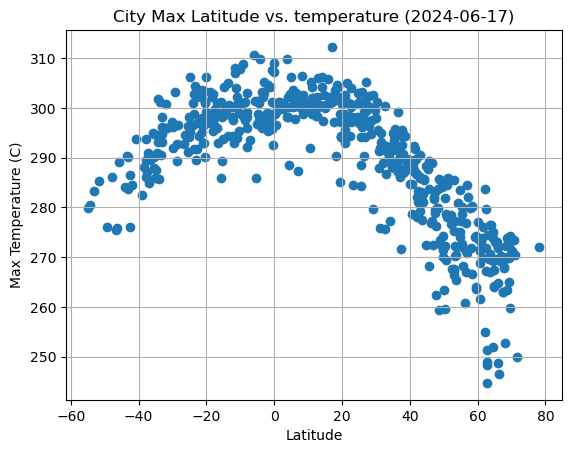

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. temperature (2024-06-17)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

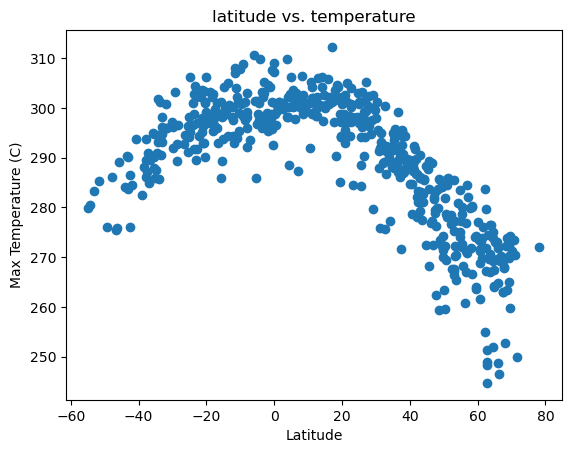

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("latitude vs. temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

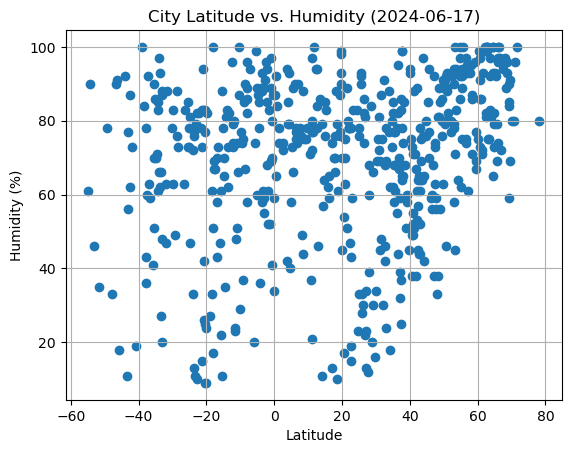

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

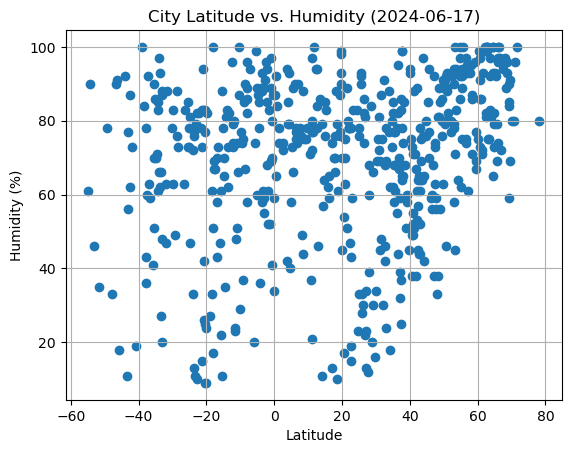

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

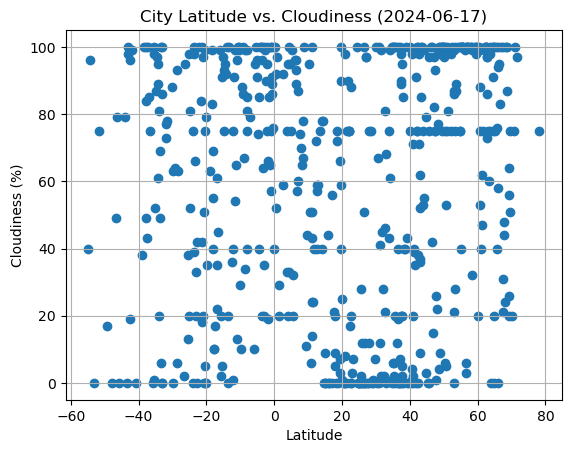

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

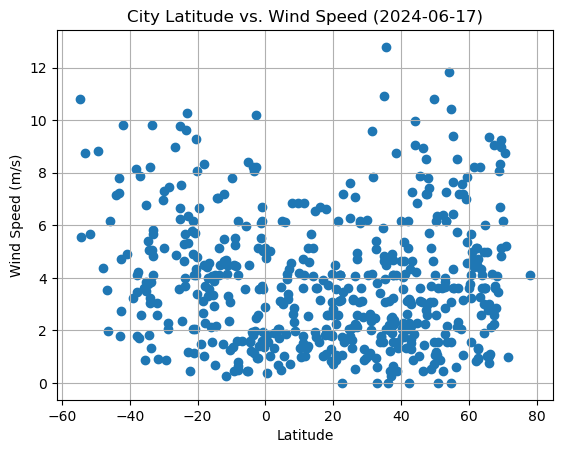

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gwadar,25.1216,62.3254,300.77,76,0,6.26,PK,1730566337
7,tabou,4.4230,-7.3528,300.11,79,33,3.10,CI,1730566548
8,murzuq,25.9155,13.9184,296.24,33,12,3.16,LY,1730566549
9,sitka,57.0531,-135.3300,282.09,61,100,7.20,US,1730566551
10,whitehorse,60.7161,-135.0538,271.58,86,75,5.66,CA,1730566552


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gwadar,25.1216,62.3254,300.77,76,0,6.26,PK,1730566337
7,tabou,4.4230,-7.3528,300.11,79,33,3.10,CI,1730566548
8,murzuq,25.9155,13.9184,296.24,33,12,3.16,LY,1730566549
9,sitka,57.0531,-135.3300,282.09,61,100,7.20,US,1730566551
10,whitehorse,60.7161,-135.0538,271.58,86,75,5.66,CA,1730566552


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,285.40,35,75,5.66,CL,1730566540
1,papatowai,-46.5619,169.4708,275.54,90,49,3.52,NZ,1730566542
3,ushuaia,-54.8000,-68.3000,279.96,61,40,10.80,AR,1730566382
4,port-aux-francais,-49.3500,70.2167,276.05,78,17,8.83,TF,1730566545
5,puerto ayora,-0.7393,-90.3518,295.68,80,86,3.58,EC,1730566546


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7536449981293938


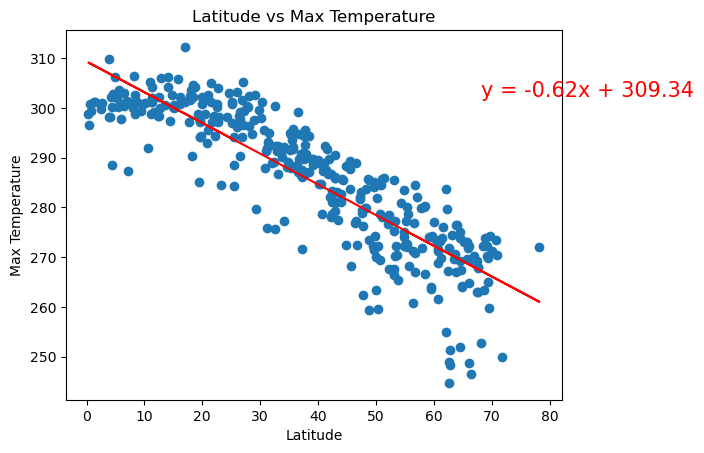

In [23]:
# Assuming northern_hemi_df is defined and contains the necessary data
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temperature")

# Print r squared value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.4581733051317095


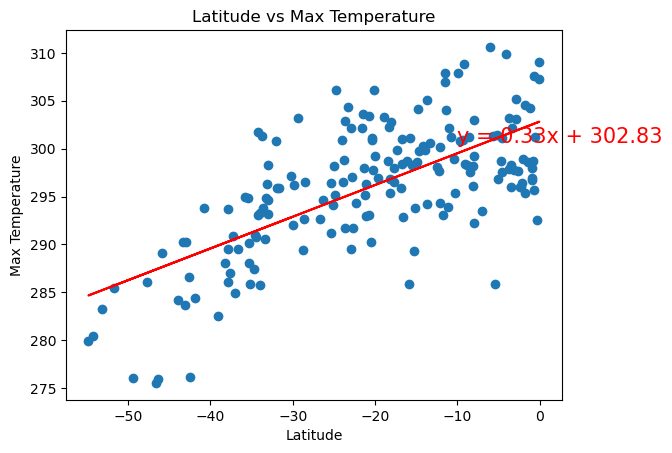

In [24]:
# Assuming northern_hemi_df is defined and contains the necessary data
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temperature")

# Print r squared value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, the regression suggest a strong inverse relationship between latitude and temperature, where higher latitudes are associated with significantly lower temperatures. Conversely, in the Southern Hemisphere, the regression indicate a weaker positive correlation, suggesting that temperature increases slightly with latitude. This discrepancy in R-squared values and slopes points to differing climatic influences and geographical features affecting temperature distribution in the two hemispheres.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.08876166120169689


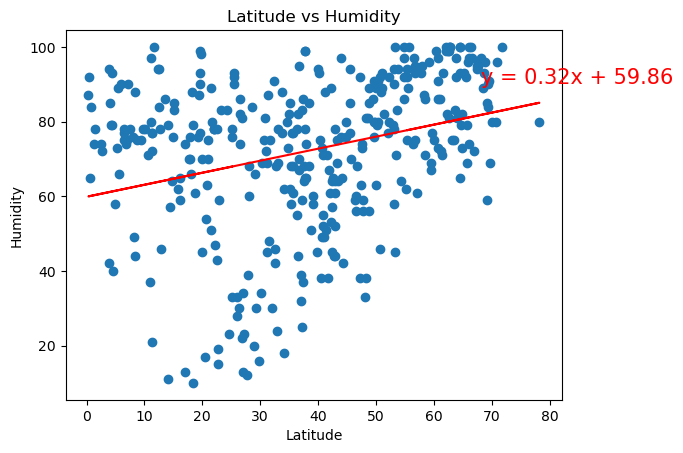

In [25]:
# Assuming northern_hemi_df is defined and contains the necessary data
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity")

# Print r squared value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.010717552991651193


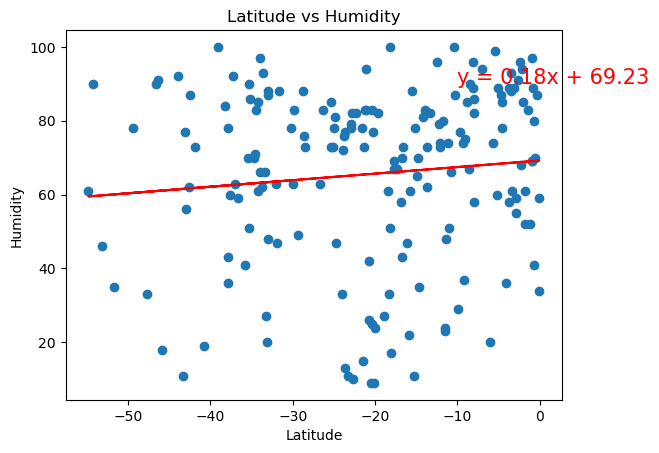

In [26]:
# Southern Hemisphere
# Assuming southern_hemi_df is defined and contains the necessary data
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity")

# Print r squared value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear regression analysis of latitude versus humidity reveals weak correlations in both the Northern and Southern Hemispheres, as evidenced by the low R-squared values. In the Northern Hemisphere, the regression suggests a very slight decrease in humidity with increasing latitude. Similarly, the Southern Hemisphere shows an even weaker relationship, with the equation and an R-squared value of 0.0107, implying that latitude has minimal influence on humidity levels. These findings suggest that factors other than latitude, such as local climate conditions and geographical features, play a more significant role in determining humidity.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.0665330831075698


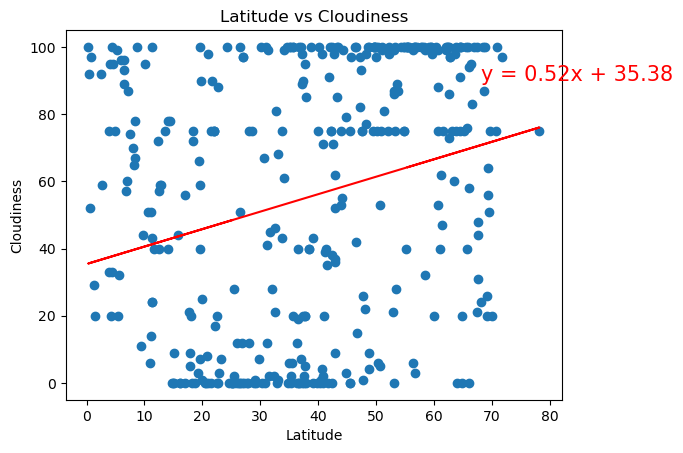

In [27]:
# Northern Hemisphere
# Assuming northern_hemi_df is defined and contains the necessary data
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness")

# Print r squared value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.03192059328293703


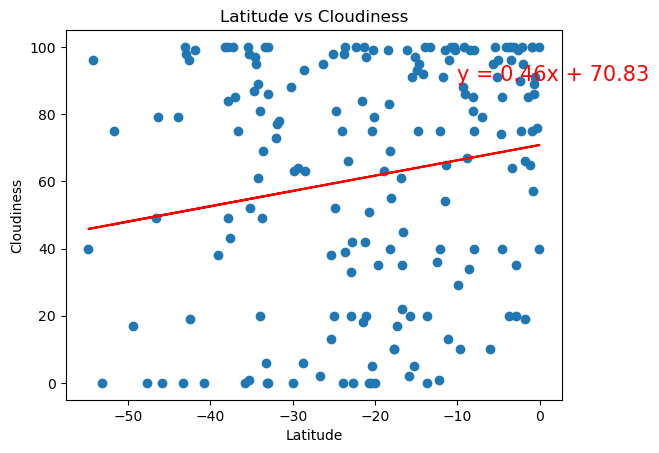

In [29]:
# Southern Hemisphere
# Assuming southern_hemi_df is defined and contains the necessary data
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness")

# Print r squared value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear regression analysis of latitude versus cloudiness indicates very weak correlations in both hemispheres, as reflected by the low R-squared values. In the Northern Hemisphere, the regression suggests a slight negative trend, where cloudiness may decrease with increasing latitude. Similarly, the Southern Hemisphere analysis shows an even weaker fit, with the equation and an R-squared value, indicating that latitude explains variability in cloudiness. These results imply that cloudiness is influenced more by other factors, such as atmospheric conditions, local weather patterns, and geographical features, rather than latitude alone.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0456732881782127


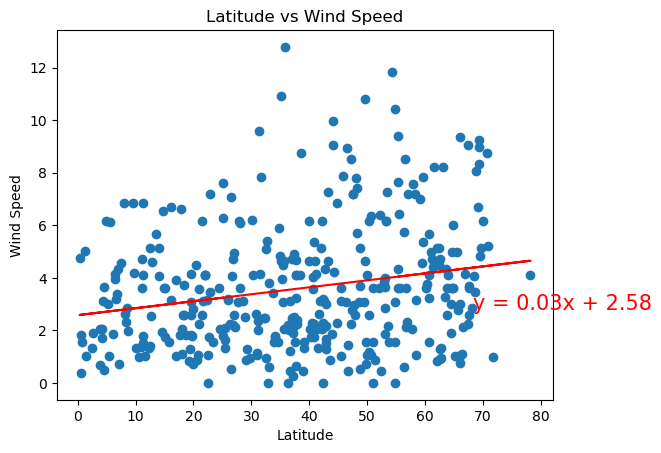

In [28]:
# Northern Hemisphere
# Assuming northern_hemi_df is defined and contains the necessary data
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")

# Print r squared value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.061617090944332875


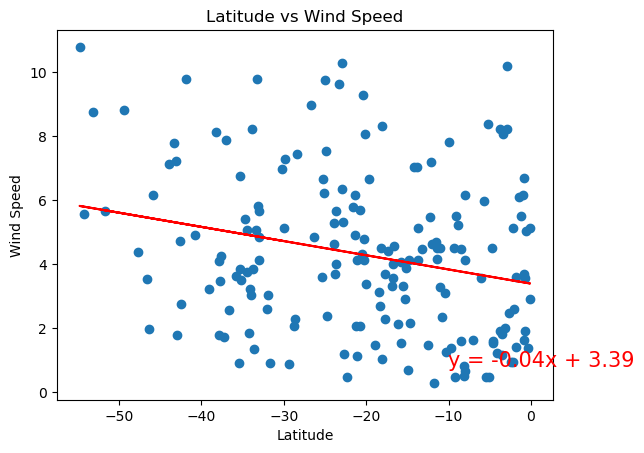

In [30]:
# Southern Hemisphere
# Assuming southern_hemi_df is defined and contains the necessary data
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")

# Print r squared value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear regression analysis of latitude versus wind speed reveals very weak correlations in both the Northern and Southern Hemispheres, as indicated by the low R-squared values. In the Northern Hemisphere, the regression suggests a minor decrease in wind speed with increasing latitude. Similarly, the Southern Hemisphere exhibits a similarly low relationship, with the equation and an R-squared value of 0.0616, meaning latitude accounts for just 6.16% of the variation in wind speed. 